# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fathan Askar
- **Email:** askarfathan@gmail.com
- **ID Dicoding:** askarfathan

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah sepeda yang disewa setiap harinya?
- Apakah ada pola musiman yang mempengaruhi jumlah persewaan sepeda di Washington D.C.?

## Import Semua Packages/Library yang Digunakan

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [88]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [89]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Data terdiri dari 3 datatypes yaitu, int64, float64 dan object
- dteday pada kedua dataset merupakan object, perlu diubah

### Assessing Data

In [90]:
print(day_data.isnull().sum())
print(day_data.describe())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

 

In [91]:
print(hour_data.isnull().sum())
print(hour_data.describe())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday  

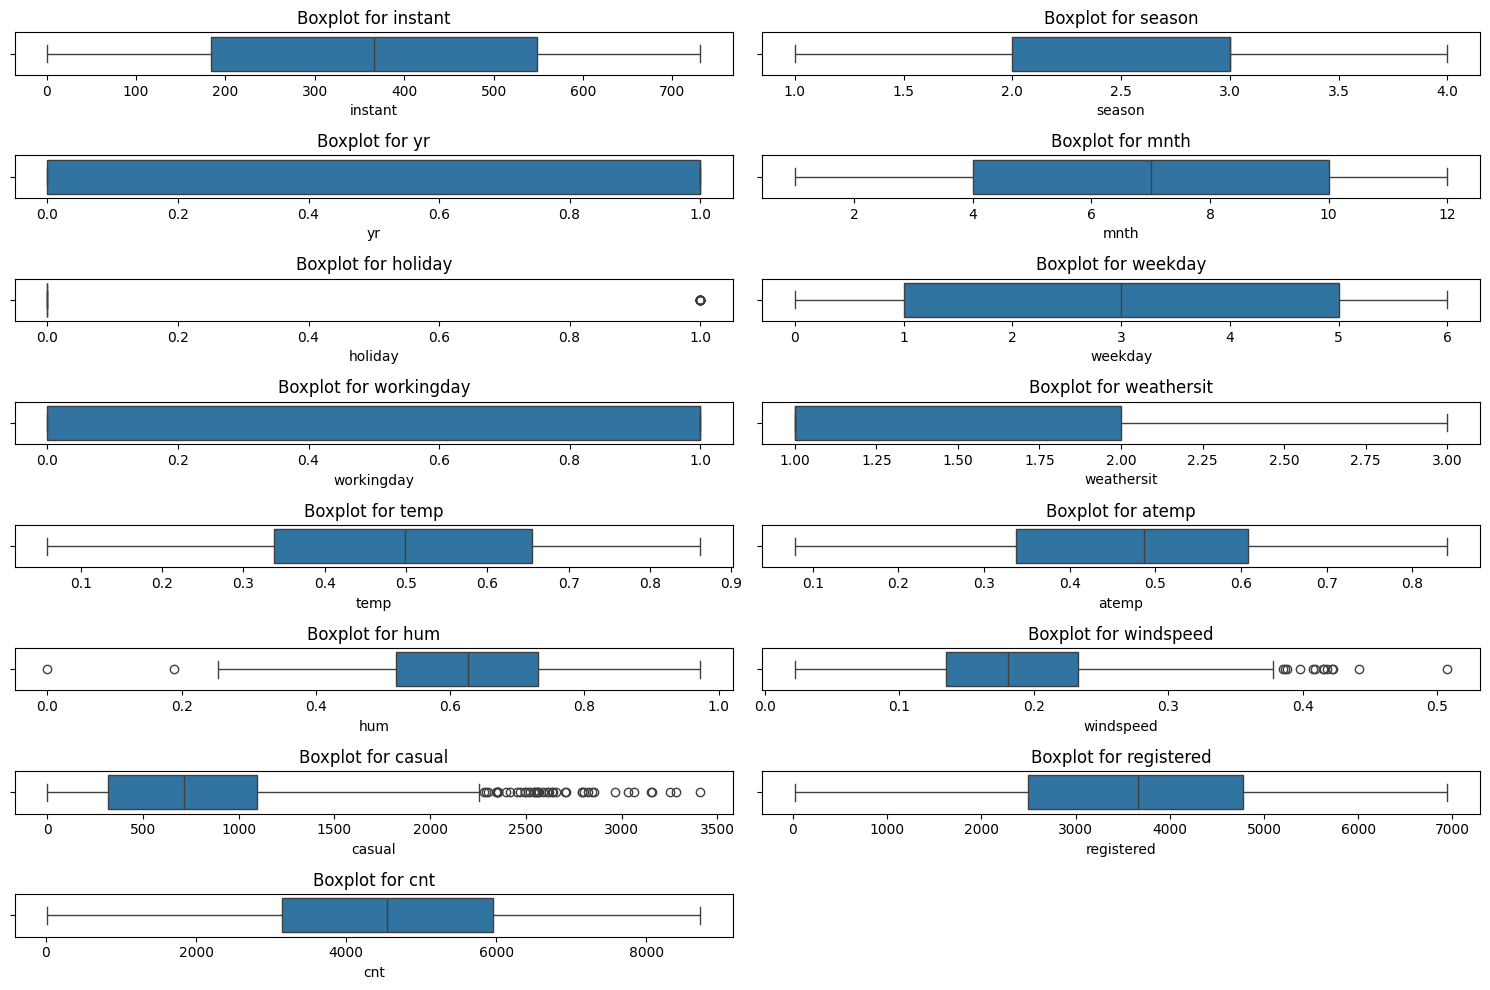

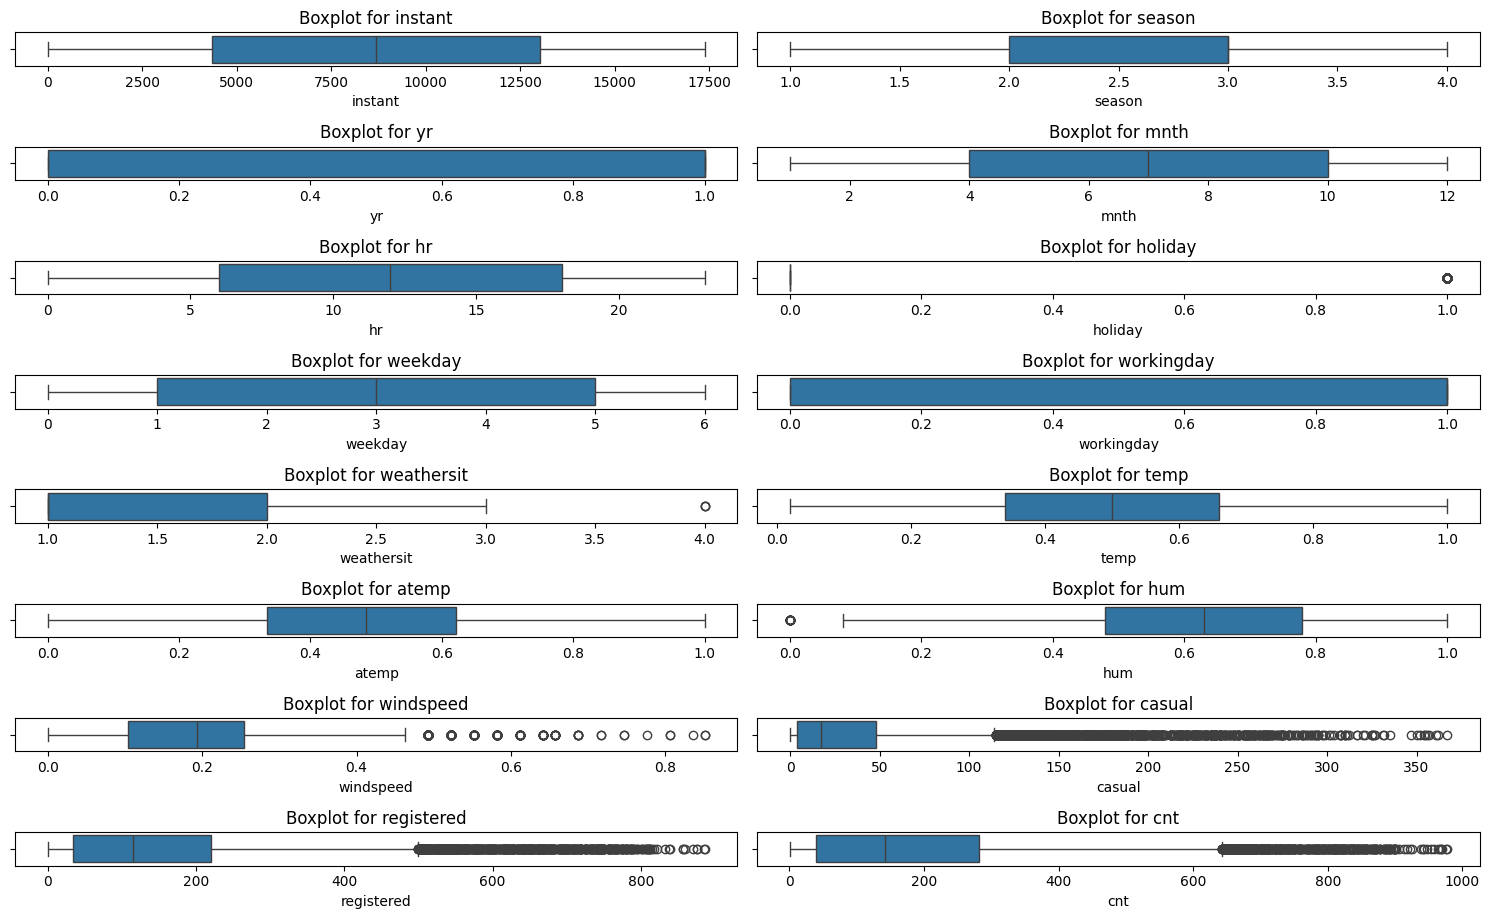

In [92]:
#Melihat Outlier
numeric_columns = day_data.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i)  
    sns.boxplot(x=day_data[column])
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()

plt.show()

numeric_columns2 = hour_data.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns2, 1):
    plt.subplot(len(numeric_columns2) // 2 + 1, 2, i)  
    sns.boxplot(x=hour_data[column])
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()

plt.show()

**Insight:**
- Tidak ada data yang kosong/null
- column dteday seharusnya merupakan datatype 'datetime', bukan object
- Terdapat beberapa outlier pada column windspeed
- Terdapat banyak outlier pada column casuual, registered, dan cnt, tetapi tidak mengaruhi pertanyaan bisnis
- Holiday merupakan data biner, jadi tidak berpengaruh pada perhitungan outlier.

### Cleaning Data

In [93]:
#Mengubah dteday menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

In [94]:
#Menghilangkan outlier pada windspeed
Q1day = day_data['windspeed'].quantile(0.15)
Q1hour = hour_data['windspeed'].quantile(0.15)

Q3day = day_data['windspeed'].quantile(0.85)
Q3hour = hour_data['windspeed'].quantile(0.85)

IQRday = Q3day- Q1day
IQRhour = Q3hour - Q3day

lower_bound_day = Q1day - 1.5 * IQRday
upper_bound_day = Q3day + 1.5 * IQRday

lower_bound_hour = Q1hour - 1.5 * IQRhour
upper_bound_hour = Q3hour + 1.5 * IQRhour

df_clean_day = day_data[(day_data['windspeed'] >= lower_bound_day) & (day_data['windspeed'] <= upper_bound_day)]
df_clean_hour = hour_data[(hour_data['windspeed'] >= lower_bound_hour) & (hour_data['windspeed'] <= upper_bound_hour)]

In [95]:
df_clean_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [96]:
df_clean_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13398 entries, 5 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     13398 non-null  int64         
 1   dteday      13398 non-null  datetime64[ns]
 2   season      13398 non-null  int64         
 3   yr          13398 non-null  int64         
 4   mnth        13398 non-null  int64         
 5   hr          13398 non-null  int64         
 6   holiday     13398 non-null  int64         
 7   weekday     13398 non-null  int64         
 8   workingday  13398 non-null  int64         
 9   weathersit  13398 non-null  int64         
 10  temp        13398 non-null  float64       
 11  atemp       13398 non-null  float64       
 12  hum         13398 non-null  float64       
 13  windspeed   13398 non-null  float64       
 14  casual      13398 non-null  int64         
 15  registered  13398 non-null  int64         
 16  cnt         13398 non-

**Insight:**
- Column dteday diubah menjadi datetime
- Data ekstrim sudah di hapus

## Exploratory Data Analysis (EDA)

### Explore Bagaimana pengaruh kondisi cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah sepeda yang disewa setiap harinya?

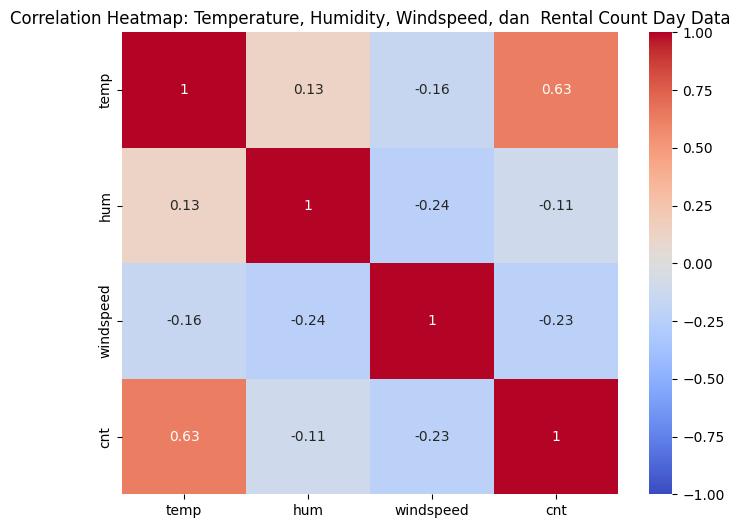

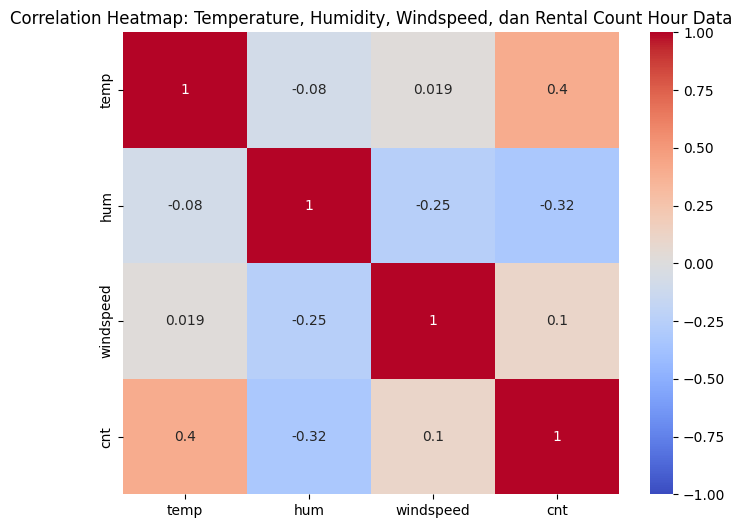

In [97]:
#Heat map korelasi untuk pertanyaan bisnis 1
relevant_columns = ['temp', 'hum', 'windspeed', 'cnt']
correlation_matrix_day = df_clean_day[relevant_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Temperature, Humidity, Windspeed, dan  Rental Count Day Data')
plt.show()

correlation_matrix_hour = df_clean_hour[relevant_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_hour, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Temperature, Humidity, Windspeed, dan Rental Count Hour Data')
plt.show()

**Insight:**
- Terdapat Korelasi positif antara suhu dan jumlah sepeda yang disewa dari kedua dataset
- Terdapat korelasi negatif antara kecepatan angin dengan sepeda yang disewa
- Terdapat korelasi negatif lemah antara kelembapan dengan sepeda yang disewa

### Explore Apakah ada pola musiman yang mempengaruhi jumlah persewaan sepeda di Washington D.C.?

In [98]:
#Untuk Melihat jumlah sepeda yang disewa berdasarkan musim (1:Semi, 2:Panas, 3:Gugur, 4:Dingin)
data_musim = df_clean_day.groupby('season')['cnt'].sum().reset_index()
print(data_musim)

   season      cnt
0       1   469713
1       2   918589
2       3  1061129
3       4   841613


**Insight:**
- Kita bisa lihat dari perhitungan jumlah sepeda yang disewa pada washington D.C bahwa pola musiman dapat mempengaruhi jumlah persewaan sepeda
- Musim Gugur merupakan musim paling banyak persewaan sepeda
- Musim Semi merupakan musim paling sedikit persewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah sepeda yang disewa setiap harinya?

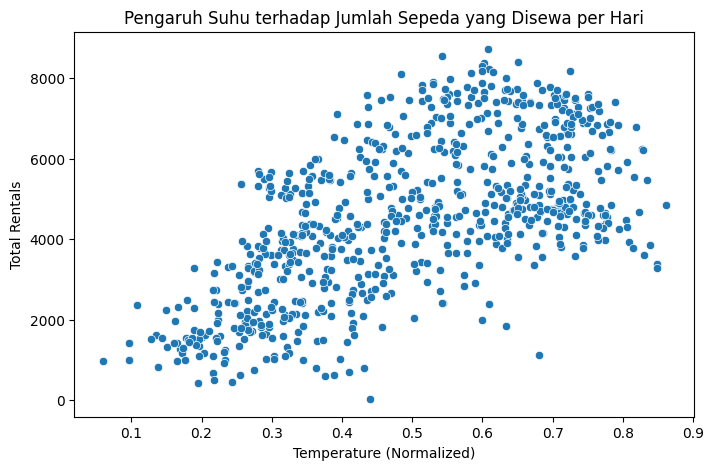

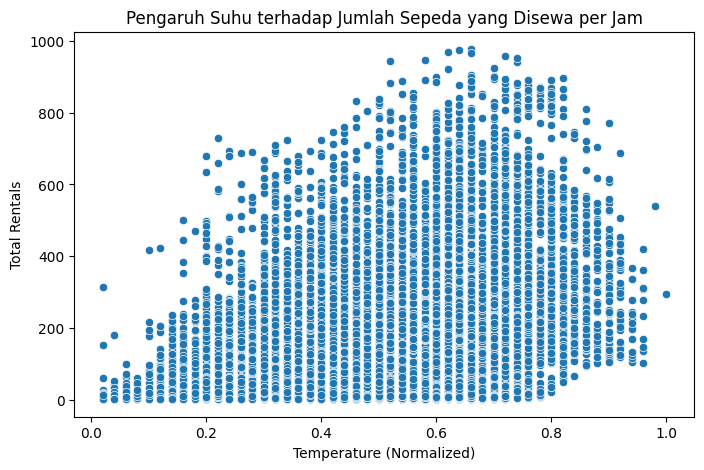

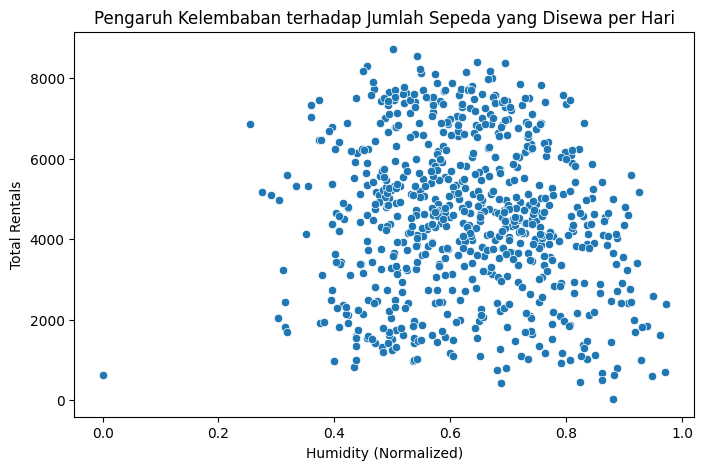

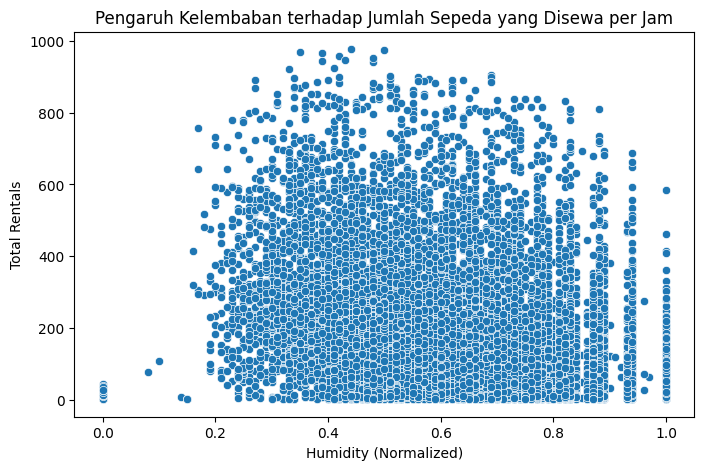

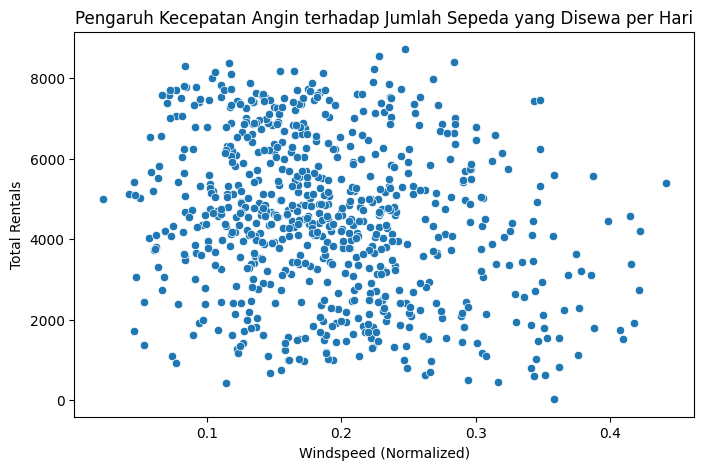

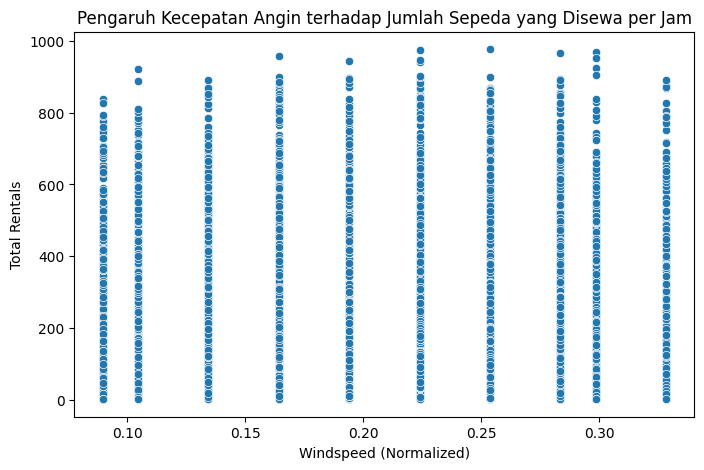

In [99]:
# Scatter plot temperature dengan rental df_clean_day
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=df_clean_day)
plt.title('Pengaruh Suhu terhadap Jumlah Sepeda yang Disewa per Hari')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Rentals')
plt.show()

# Scatter plot temperature dengan rental df_clean_hour
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='cnt', data=df_clean_hour)
plt.title('Pengaruh Suhu terhadap Jumlah Sepeda yang Disewa per Jam')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Rentals')
plt.show()

# Scatter plot untuk humidity df_clean_day
plt.figure(figsize=(8, 5))
sns.scatterplot(x='hum', y='cnt', data=df_clean_day)
plt.title('Pengaruh Kelembaban terhadap Jumlah Sepeda yang Disewa per Hari')
plt.xlabel('Humidity (Normalized)')
plt.ylabel('Total Rentals')
plt.show()

# Scatter plot untuk humidity df_clean_hour
plt.figure(figsize=(8, 5))
sns.scatterplot(x='hum', y='cnt', data=df_clean_hour)
plt.title('Pengaruh Kelembaban terhadap Jumlah Sepeda yang Disewa per Jam')
plt.xlabel('Humidity (Normalized)')
plt.ylabel('Total Rentals')
plt.show()

# Scatter plot untuk windspeed df_clean_day
plt.figure(figsize=(8, 5))
sns.scatterplot(x='windspeed', y='cnt', data=df_clean_day)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Sepeda yang Disewa per Hari')
plt.xlabel('Windspeed (Normalized)')
plt.ylabel('Total Rentals')
plt.show()

# Scatter plot untuk windspeed df_clean_hour
plt.figure(figsize=(8, 5))
sns.scatterplot(x='windspeed', y='cnt', data=df_clean_hour)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Sepeda yang Disewa per Jam')
plt.xlabel('Windspeed (Normalized)')
plt.ylabel('Total Rentals')
plt.show()


Explanatory Analysis:
Dari visualisasi-visualisasi berikut, kita dapat mengetahui bahwa suhu memiliki korelasi positif terhadap jumlah sewa sepeda, kelembapan memiliki korelasi negatif terhadap jumlah sewa sepeda, dan kecepatan angin memiliki korelasi negatif yang lemah terhadapt jumalah sewa sepeda

### Pertanyaan 2: Apakah ada pola musiman yang mempengaruhi jumlah persewaan sepeda di Washington D.C.?

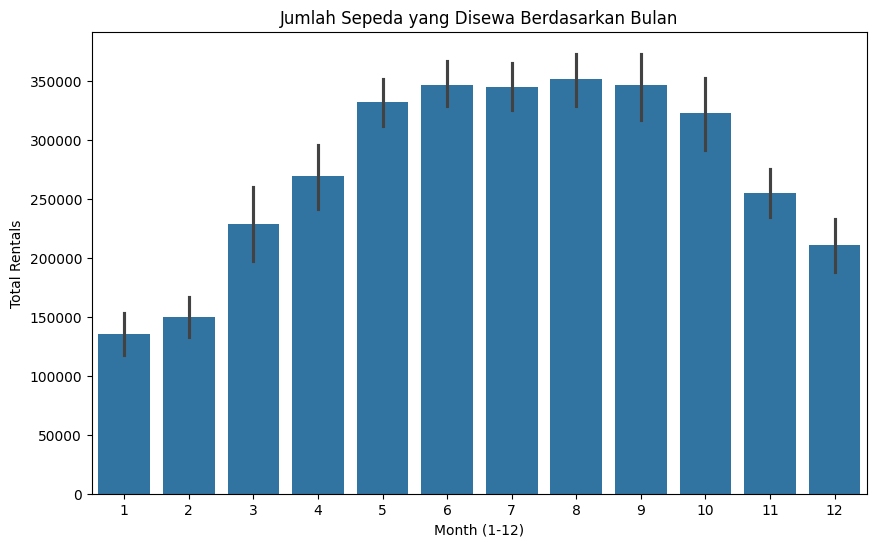

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=df_clean_day, estimator=sum)
plt.title('Jumlah Sepeda yang Disewa Berdasarkan Bulan')
plt.xlabel('Month (1-12)')
plt.ylabel('Total Rentals')
plt.show()

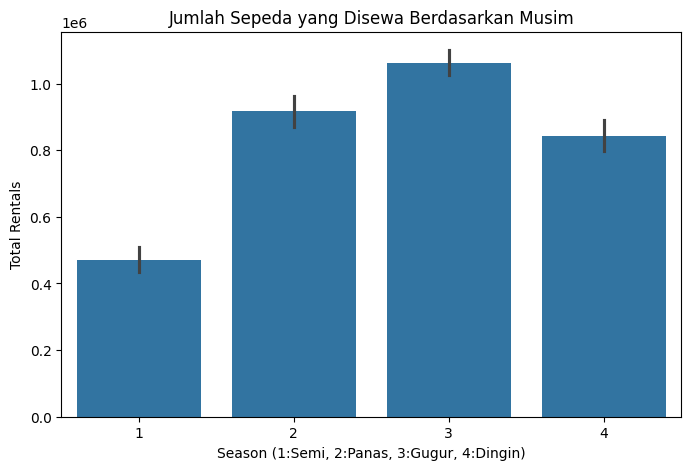

In [100]:
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=df_clean_day, estimator=sum)
plt.title('Jumlah Sepeda yang Disewa Berdasarkan Musim')
plt.xlabel('Season (1:Semi, 2:Panas, 3:Gugur, 4:Dingin)')
plt.ylabel('Total Rentals')
plt.show()

Explanatory Analysis:
Dari visualisasi berikut, kita dapat mengetahui bahwa Musim Gugur dan Musim Panas merupakan puncak dalam penyewaan seepda, sementara musim Semi Menunjukkan jumlah penyewaan yang paling rendah

## Conclusion

- Dari pertanyaan pertama, "Bagaimana pengaruh kondisi cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah sepeda yang disewa setiap harinya?", kita bisa lihat dari data kalau tidak semua cuaca memiliki pengaruh besar terhadap jumlah sepeda yang di sewa, tetapi suhu memiliki pengaruh yang paling tinggi terhadap jumlah sewa sepeda dengan korelasi 0.63 pada data day dan 0.40 pada data hour.
- Dari pertanyaan kedua, "Apakah ada pola musiman yang mempengaruhi jumlah persewaan sepeda di Washington D.C.?", kita bisa lihat dari data kalau penyewaan sepeda meningkat secara signifikan pada Musim Gugur dan Musim Panas. Sementara Musim Semi merupakan musim dengan penyeweaan sepeda yang paling rendah